## Mean Shift Clustering on Make_Blobs Data Set

In [1]:
# Importing Libraries

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [2]:
centers = [[1,1],[2,2],[3,3]]
X, _ = make_blobs(n_samples=5000, centers=centers, cluster_std=0.2)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=0.392204034232682, bin_seeding=True)

In [3]:
labels=ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_= len(labels_unique)
print("Estimated Clusters are : %d" % n_clusters_ )

Estimated Clusters are : 3


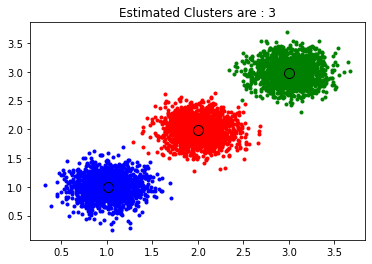

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
    plt.title('Estimated Clusters are : %d' % n_clusters_)
    plt.show